In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cleaned_salary_data.csv')

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
X = df.drop(columns=['Salary Estimate'])
y = df['Salary Estimate']

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [21]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-15.77616214248816

In [23]:
lm_l = Lasso()

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.54862419941765, tolerance: 55.974618845177666
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.91409250967672, tolerance: 58.909378734177224
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.37139895894506, tolerance: 61.93404215189873
  model = cd_fast.sparse_enet_coordinate_descent(


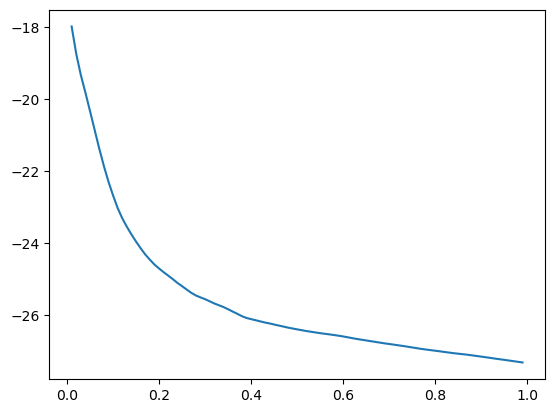

In [36]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)


In [37]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error ==max(df_err.error)]

,alpha,error
0,0.01,-17.989325


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-19.351470542993386

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10),'criterion':('squared_error', 'poisson', 'absolute_error', 'friedman_mse'),'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 1044.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\tusha\anaconda3\Lib\site-packa

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'poisson',
                                       'absolute_error', 'friedman_mse'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [43]:
print(gs.best_estimator_)
print(gs.best_score_)

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=240)
-18.932821606504984


In [44]:
lm_l = Lasso(alpha=0.1)
lm_l.fit(X_train,y_train)

Lasso(alpha=0.1)

In [45]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
tpred_lm = lm.predict(X_test)
tpred_lm_l = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lm_l))
print(mean_absolute_error(y_test,tpred_rf))

13.608865547674244
20.610743066162367
15.258263422818791
